# LSTM Best Model
## The best model is time steps 1

In [ ]:
model_path = f'/content/drive/MyDrive/NYSE_Dataset/best_model_time_steps_{1}.h5'
lstm_best_model = load_model(model_path)

X_train, X_test, y_train, y_test = load_data(1)

y_pred = lstm_best_model.predict(X_test)

# Calculate metrics
lstm_me = np.mean(y_pred - y_test)
lstm_mae = mean_absolute_error(y_test, y_pred)
lstm_mse = mean_squared_error(y_test, y_pred)
lstm_rrmse = root_relative_mean_squared_error(y_test, y_pred)
lstm_r_squared = r2_score(y_test, y_pred)

# Print metrics
print(f"Metrics for time_steps={time_steps}:")
print(f"ME: {lstm_me:.2f}%")
print(f"MAE: {lstm_mae:.4f}")
print(f"MSE: {lstm_mse:.4f}")
print(f"rRMSE: {lstm_rrmse:.4f}\n")
print(f"R_squared: {lstm_r_squared:.4f}\n")

381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Metrics for time_steps=10:
ME: -0.00%
MAE: 0.0012
MSE: 0.0000
rRMSE: 0.0171

R_squared: 0.9883



# LSTM best model Summary

In [ ]:
lstm_best_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 500)                 │       1,104,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,104,503 (4.21 MB)

 Trainable params: 1,104,501 (4.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
print("Optimizer:", lstm_best_model.optimizer)
print("Loss Function:", lstm_best_model.loss)
print("Units:", lstm_best_model.get_layer(index=0).units)
print("Learning Rate:", lstm_best_model.optimizer.learning_rate.numpy())

Optimizer: <keras.src.optimizers.adam.Adam object at 0x7dfae509f0a0>
Loss Function: <function mean_squared_error at 0x7dfaf265d6c0>
Units: 500
Learning Rate: 1e-04


## Visualization of Actual vs Predict close price for Lstm

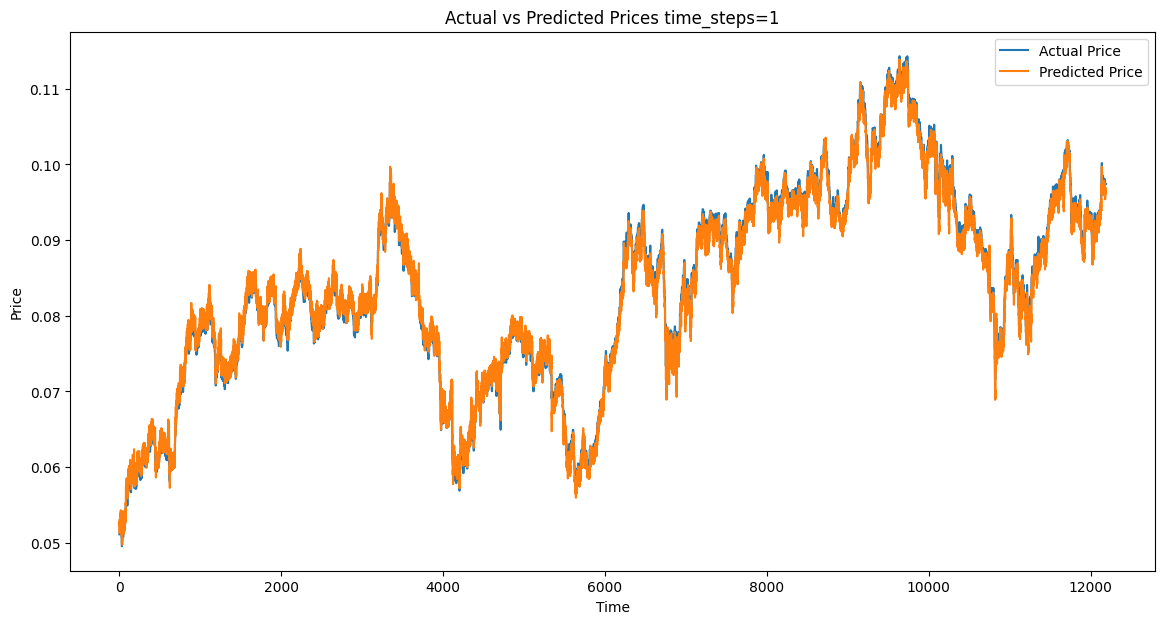

In [ ]:
# Visualize actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title(f'Actual vs Predicted Prices time_steps={1}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Visualization of a specific Stocks

In [ ]:
# List of symbols to filter
symbols_to_keep = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'TSLA', 'NVDA', 'NFLX', 'JPM', 'CSCO',
                   'WMT', 'XOM', 'PG', 'AMD', 'IBM']

# Filter the DataFrame
stock_df = df_sf[df_sf['symbol'].isin(symbols_to_keep)]

# Select the features for the RNN
selected_features = [
      'open', 'close', 'low', 'high', 'volume',
       'Earnings Before Interest and Tax', 'Net Income', 'Operating Income',
       'Gross Profit', 'Profit Margin', 'Gross Margin', 'Operating Margin',
       'Pre-Tax Margin', 'After Tax ROE', 'Earnings Per Share',
       'Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Long-Term Debt',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Total Liabilities', 'Total Equity', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Estimated Shares Outstanding',
       'Sale and Purchase of Stock', 'RSI', 'MV20', 'MV50', 'MV200', 'MACD',
       'ADX', 'AD', 'Bollinger_MAVG', 'Bollinger_High', 'Bollinger_Low',
       'Stochastic', 'ROC', 'stoch', 'roc', 'ema_20', 'ema_50', 'obv', 'vpt',
       'cci', 'mfi', 'kc_middle', 'kc_upper', 'kc_lower'
]

# Scale the features
scaler = MinMaxScaler()
stock_df[selected_features] = scaler.fit_transform(stock_df[selected_features])

# Encode the 'symbol' column
label_encoder = LabelEncoder()
stock_df['symbol_encoded'] = label_encoder.fit_transform(stock_df['symbol'])

# Drop the original 'symbol' column if no longer needed
stock_df = stock_df.drop(columns=['symbol'])


<ipython-input-8-e72c517aa759>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df[selected_features] = scaler.fit_transform(stock_df[selected_features])
<ipython-input-8-e72c517aa759>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['symbol_encoded'] = label_encoder.fit_transform(stock_df['symbol'])


In [ ]:
# Define a function to prepare the data for a specific stock and time steps
def prepare_data_for_stock(stock_df, stock_symbol, time_steps):
    stock_data = stock_df[stock_df['symbol_encoded'] == label_encoder.transform([stock_symbol])[0]]
    X = stock_data.drop(['date', 'close'], axis=1).values
    y = stock_data['close'].values

    X_time_steps = []
    y_time_steps = []

    for i in range(len(X) - time_steps):
        X_time_steps.append(X[i:i + time_steps])
        y_time_steps.append(y[i + time_steps])

    return np.array(X_time_steps), np.array(y_time_steps)

# Predict prices for two stocks using Time Steps = 1
time_steps = 1


# Load the best model for Time Steps = 1
model_path = f'/content/drive/MyDrive/NYSE_Dataset/best_model_time_steps_{time_steps}.h5'
best_model = load_model(model_path)



214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


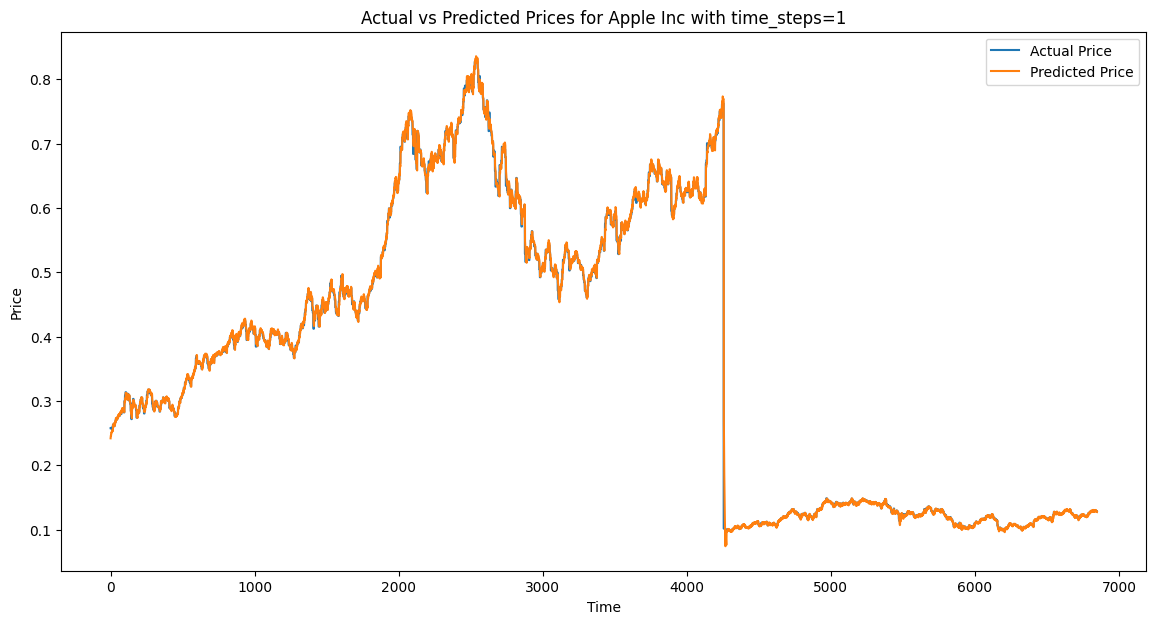

In [ ]:
predictions = {}


X_stock, y_stock = prepare_data_for_stock(stock_df, 'AAPL', time_steps)

y_pred = best_model.predict(X_stock)

# Store the predictions
predictions['AAPL'] = (y_stock, y_pred)

# Visualize actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_stock, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title(f'Actual vs Predicted Prices for Apple Inc with time_steps={time_steps}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


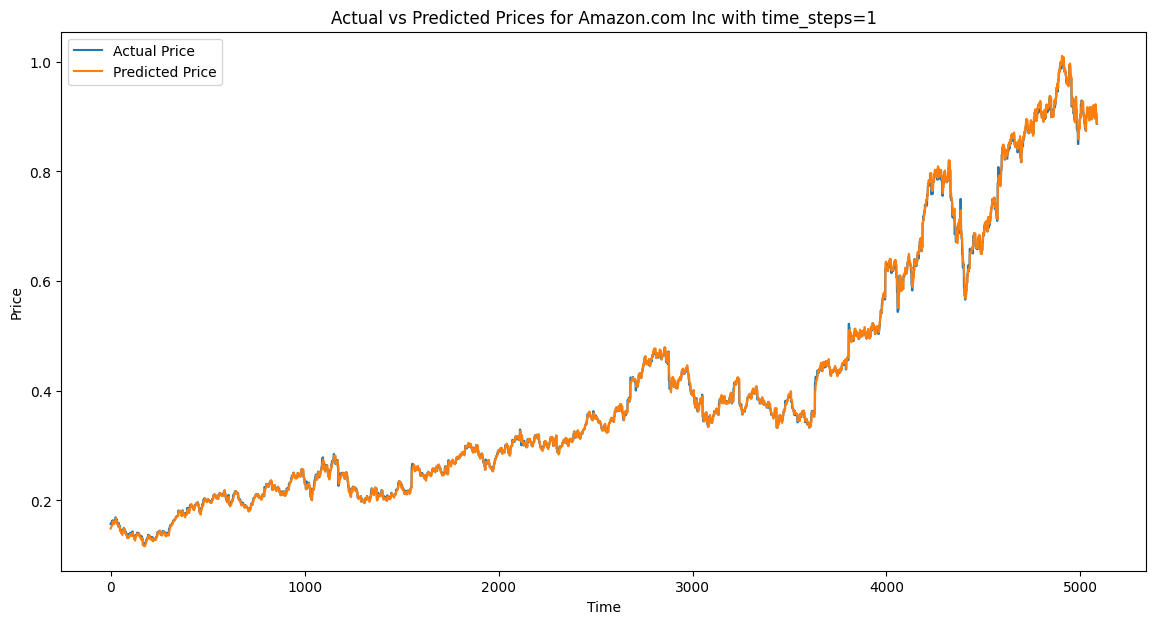

In [ ]:
predictions = {}


X_stock, y_stock = prepare_data_for_stock(stock_df, 'AMZN', time_steps)

y_pred = best_model.predict(X_stock)

# Store the predictions
predictions['AMZN'] = (y_stock, y_pred)

# Visualize actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_stock, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title(f'Actual vs Predicted Prices for Amazon.com Inc with time_steps={time_steps}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()